# Data gathering and exploration notebook

# Setup
## Improt dependencies

In [1]:
import fastf1
import numpy as np
import pandas as pd

from IPython.display import clear_output
from time import sleep
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap
from matplotlib import cm

In [2]:
fastf1.Cache.enable_cache("./cache")

## Graphing function

In [3]:
def graph_value_on_track(
    telemetry: fastf1.core.Telemetry,
    on: str = "Speed",
    cmap = None,
    title: str = None,
    cbar_title: str = None,
    save_name: str = None) -> None:

    x = np.array(telemetry["X"].values)
    y = np.array(telemetry["Y"].values)

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    speed = telemetry[on].to_numpy().astype(float)

    lc_comp = LineCollection(segments, linestyle='solid')
    lc_comp.set_array(speed)
    lc_comp.set_linewidth(4)

    if cmap is not None:
        lc_comp.set_cmap(cmap)

    fig, ax = plt.subplots()
    fig.set_facecolor("#24283B")
    ax.set_facecolor("#24283B")
    ax.set_frame_on(False)
    ax.set_xlim(np.min(x) - 500, np.max(x) + 500)
    ax.set_ylim(np.min(y) - 500, np.max(y) + 500)
    ax.set_axis_off()

    ax.add_collection(lc_comp)

    # plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)
    if title is not None:
        figtitle = plt.suptitle(title, color="white")

    colorbar = fig.colorbar(lc_comp)
    colorbar.ax.tick_params(color="white", labelcolor="white")
    if cbar_title is not None:
        colorbar.set_label(cbar_title, color="white")

    plt.sci(lc_comp)
    
    if save_name is not None:
        plt.savefig(save_name, transparent=False)


## Colormap

In [4]:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
base_colormap = cm.get_cmap("turbo")
new_colors = base_colormap(np.linspace(0.5, 1, 256))
colormap = ListedColormap(new_colors)

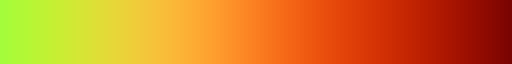

In [5]:
colormap

# Analyse Japanese Grand Prix

In [6]:
jap_ses = fastf1.get_session(2022, "Japanese Grand Prix", "R")
jap_ses.load()
clear_output()
jap_ses.event.name

/home/zetrext/.conda/envs/f1/lib/python3.8/site-packages/fastf1/events.py:676: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


'Japanese Grand Prix'

In [7]:
# Get best lap
jap_lap = jap_ses.laps.pick_fastest()
jap_tel = jap_lap.get_telemetry()
sleep(1)
clear_output()
jap_tel.shape

(782, 18)

In [8]:
jap_tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-10-09 07:50:33.257,0 days 03:49:32.980000,,193.760000,0 days 00:00:00,11639,255,6,100,False,1,interpolation,0.019031,0.000003,OnTrack,1714,-860,742
3,2022-10-09 07:50:33.302,0 days 03:49:33.025000,,193.760000,0 days 00:00:00.045000,11579,256,6,100,False,1,pos,3.240694,0.000559,OnTrack,1743,-894,741
4,2022-10-09 07:50:33.369,0 days 03:49:33.092000,,193.760000,0 days 00:00:00.112000,11458,258,6,100,False,1,car,8.066667,0.001393,OnTrack,1784,-942,739
5,2022-10-09 07:50:34.401,0 days 03:49:34.124000,,193.760000,0 days 00:00:01.144000,11119,264,6,100,False,1,pos,85.726209,0.014800,OnTrack,2281,-1523,718
6,2022-10-09 07:50:34.450,0 days 03:49:34.173000,10,193.760000,0 days 00:00:01.193000,10780,271,7,100,False,1,car,89.441944,0.015441,OnTrack,2294,-1539,717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,2022-10-09 07:52:17.089,0 days 03:51:16.812000,22,406.823333,0 days 00:01:43.832000,11525,253,6,100,False,1,car,5737.814722,0.990580,OnTrack,1426,-523,754
780,2022-10-09 07:52:17.329,0 days 03:51:17.052000,22,395.156667,0 days 00:01:44.072000,11668,255,6,100,False,1,car,5754.814722,0.993514,OnTrack,1549,-668,749
781,2022-10-09 07:52:17.361,0 days 03:51:17.084000,22,389.190000,0 days 00:01:44.104000,11510,257,6,100,False,1,pos,5757.102011,0.993909,OnTrack,1566,-688,749
782,2022-10-09 07:52:17.569,0 days 03:51:17.292000,22,383.223333,0 days 00:01:44.312000,11353,259,6,100,False,1,car,5772.081389,0.996495,OnTrack,1673,-813,744


### Speed

In [9]:
title = f"""Fastest Lap Speed Visualization
{jap_lap['Driver']} - {jap_ses.event['EventName']} {jap_ses.event.year}
"""

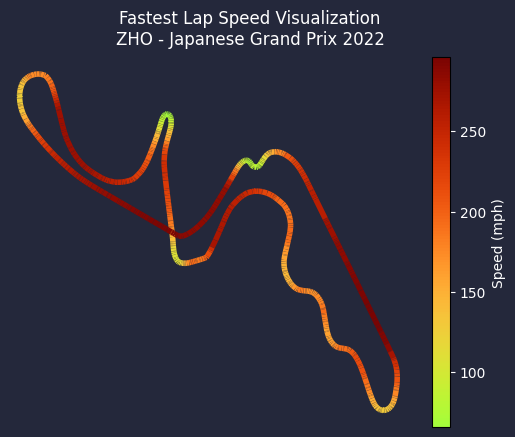

In [10]:
graph_value_on_track(
    jap_tel,
    on="Speed",
    cmap=colormap,
    title=title,
    cbar_title="Speed (mph)",
    save_name = "jap.png"
)

### Throttle

In [11]:
title2 = f"""Fastest Lap Throttle Visualization
{jap_lap['Driver']} - {jap_ses.event['EventName']} {jap_ses.event.year}
"""

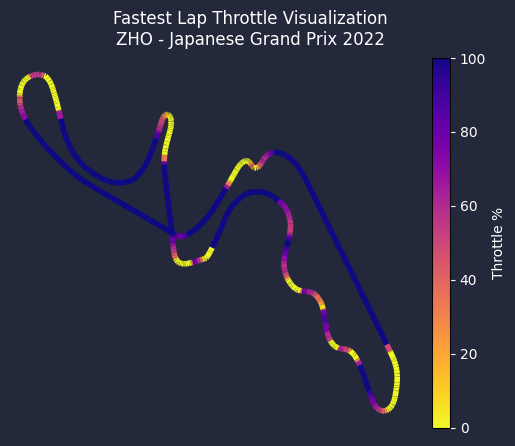

In [12]:
graph_value_on_track(
    jap_tel,
    on="Throttle",
    cmap=cm.get_cmap("plasma").reversed("plasma"),
    title=title2,
    cbar_title="Throttle %",
    save_name = "jap_t.png"
)

# Alalysing Bahrain Grand Prix

In [13]:
bah_ses = fastf1.get_session(2022, "Bahrain Grand Prix", "R")
bah_ses.load()
clear_output()
bah_ses.event.name

/home/zetrext/.conda/envs/f1/lib/python3.8/site-packages/fastf1/events.py:676: FutureWarning: The `Weekend.name` property is deprecated and will beremoved in a future version.
Use `Event['EventName']` or `Event.EventName` instead.
  warnings.warn(


'Bahrain Grand Prix'

In [14]:
# Get best lap
bah_lap = bah_ses.laps.pick_fastest()
bah_tel = bah_lap.get_telemetry()
sleep(1)
clear_output()
bah_tel.shape

(706, 18)

In [15]:
bah_tel

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-03-20 16:30:01.137,0 days 02:29:01.120000,,NaN,0 days 00:00:00,11301,280,7,100,False,1,interpolation,0.046505,0.000009,OnTrack,-372,1305,-151
3,2022-03-20 16:30:01.200,0 days 02:29:01.183000,,NaN,0 days 00:00:00.063000,11321,281,7,100,False,1,pos,4.982442,0.000929,OnTrack,-375,1379,-159
4,2022-03-20 16:30:01.322,0 days 02:29:01.305000,,NaN,0 days 00:00:00.185000,11361,282,7,100,False,1,car,14.566667,0.002717,OnTrack,-369,1498,-159
5,2022-03-20 16:30:01.522,0 days 02:29:01.505000,,NaN,0 days 00:00:00.385000,11439,284,7,100,False,1,car,30.344444,0.005661,OnTrack,-362,1657,-159
6,2022-03-20 16:30:01.600,0 days 02:29:01.583000,,NaN,0 days 00:00:00.463000,11462,284,7,100,False,1,pos,36.509060,0.006811,OnTrack,-360,1709,-159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,2022-03-20 16:31:35.243,0 days 02:30:35.226000,,NaN,0 days 00:01:34.106000,11200,278,7,100,False,1,car,5323.129444,0.993048,OnTrack,-396,953,-159
704,2022-03-20 16:31:35.361,0 days 02:30:35.344000,,NaN,0 days 00:01:34.224000,11257,278,7,100,False,1,pos,5332.266634,0.994752,OnTrack,-389,1088,-159
705,2022-03-20 16:31:35.483,0 days 02:30:35.466000,,NaN,0 days 00:01:34.346000,11314,279,7,100,False,1,car,5341.729444,0.996518,OnTrack,-385,1159,-158
706,2022-03-20 16:31:35.641,0 days 02:30:35.624000,,NaN,0 days 00:01:34.504000,11326,279,7,100,False,1,pos,5354.010670,0.998809,OnTrack,-383,1213,-159


### Speed

In [16]:
title = f"""Fastest Lap Speed Visualization
{bah_lap['Driver']} - {bah_ses.event['EventName']} {bah_ses.event.year}
"""

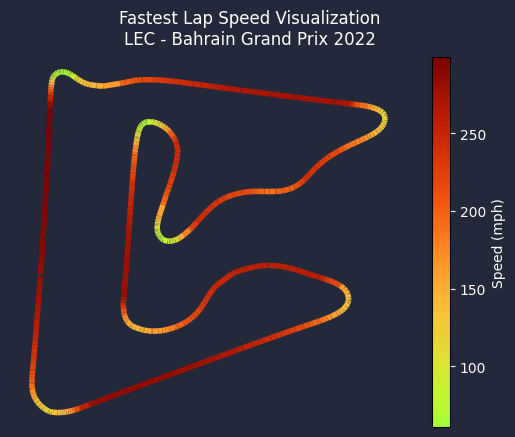

In [17]:
graph_value_on_track(
    bah_tel,
    on="Speed",
    cmap=colormap,
    title=title,
    cbar_title="Speed (mph)",
    save_name = "bah.png"
)

### Throttle

In [ ]:
title2 = f"""Fastest Lap Throttle Visualization
{bah_lap['Driver']} - {bah_ses.event['EventName']} {bah_ses.event.year}
"""

: 

In [ ]:
graph_value_on_track(
    bah_tel,
    on="Throttle",
    cmap=cm.get_cmap("plasma").reversed("plasma"),
    title=title2,
    cbar_title="Throttle %",
    save_name = "bah_t.png"
)

: 